# Trabalho 2: Otimização multimodal sem restrição





***Definir uma função escalar multimodal $J(x)$ com, pelo menos, 3 mínimos (cada discente utiliza uma função diferente). Encontrar numericamente por descida de gradiente $x^* \in \mathbb{R}$ que minimize $J(x)$ e $J(x^*)$ com diferentes valores $\alpha$ constantes e diferentes condições iniciais. Avaliar a influência de $\alpha$ e da condição inicial no processo de otimização, tanto em relação ao mínimo encontrado quanto em relação ao número de iterações para convergência. Mostrar graficamente a função escolhida, passos intermediários da descida de gradiente e o (-) vetor gradiente.***


Uma função multimodal é uma função matemática que possui mais de um mínimo (ou máximo) local em seu domínio. Na otimização multimodal sem restrição busca-se encontrar os múltiplos mínimos da função objetivo sem impor limitações específicas nas variáveis.

 Segundo, Nocedal e Wright, muitos algoritmos de problemas de otimização buscam apenas uma solução local. Ou seja,  um ponto no qual a função objetivo é menor do que em todos os outros pontos próximos viáveis. Para esses algoritmos, geralmente é difícil entcontrar a solução global - o ponto com menor valor de função entre todos os pontos factíveis- já que eles tendem a ser "presos" em minimizadores locais.

Para testar o algorítmo do gradiente descendente, foram escolhidas as funções multimodais de Himmelblau:
 $$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

E Rosenbrock:

$$f(x, y) = (a - x)^2 + b(y - x^2)^2$$

 E variados os parâmetros $\alpha$, $x_0$ e $K$ no cálculo do gradiente descendente. Para ambas as funções, foram selecionados 5 valores distintos de $x_0$ fazendo com que a trajetória parta dos pontos extremos do intervalo no qual cada função esta definida e do ponto $(0, 0)$. Além disso, em alguns casos o número de iterações foi mantido constante enquanto a ordem de grandeza da taxa de aprendizado variava.



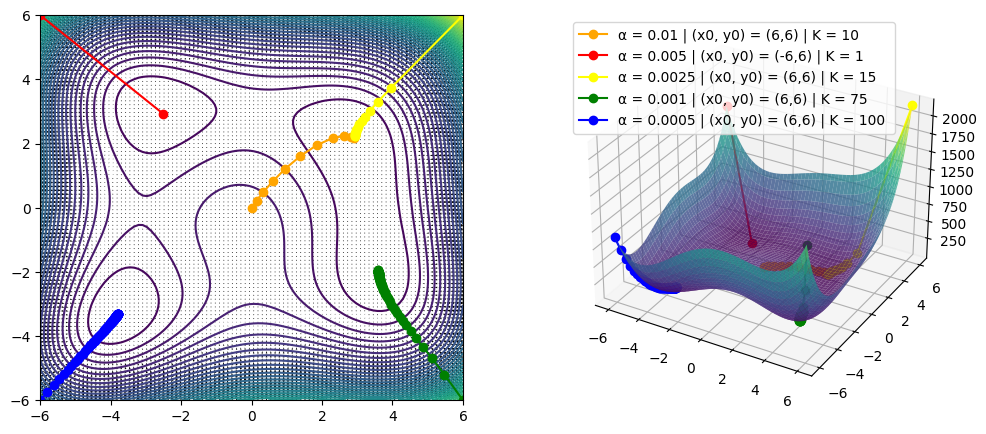

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Himmelblau(x, y):
  return (((x**2+y-11)**2)+((x+ y**2-7)**2))

def Grad(x, y):
    df_dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    df_dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([df_dx, df_dy])


def GradientDescent(xk, yk, alpha, K):
    PointsHist = [[xk, yk, Himmelblau(xk, yk)]]
    for k in range(K):
      gradiente = Grad(xk, yk)
      xk = xk - (alpha * gradiente[0])
      yk = yk - (alpha * gradiente[1])
      PointsHist.append([xk, yk, Himmelblau(xk, yk)])
    return (np.array(PointsHist))

def GetSurface():
  X, Y = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
  Z = Himmelblau(X, Y)
  return(np.array([X, Y, Z]))

def PlotLevelCurve(fig, X, Y, Z):
  ax1 = fig.add_subplot(1, 2, 1)
  plt.contour(X, Y, Z, levels=50, cmap='viridis')
  PlotGradVector(X, Y, ax1)
  TestGradientDescent(ax1, '2D')

def PlotSurface(fig, X, Y, Z):
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    TestGradientDescent(ax2, '3D')


def TestGradientDescent(ax, mood):
      PlotGradientDescent(0, 0, 0.01, 10,
                          'orange', 'α = 0.01 | (x0, y0) = (6,6) | K = 10', ax, mood)
      PlotGradientDescent(-6, 6, 0.005, 1,
                          'red', 'α = 0.005 | (x0, y0) = (-6,6) | K = 1', ax, mood)
      PlotGradientDescent(6, 6, 0.0025, 15,
                          'yellow', 'α = 0.0025 | (x0, y0) = (6,6) | K = 15', ax, mood)
      PlotGradientDescent(6, -6, 0.001, 75,
                          'green', 'α = 0.001 | (x0, y0) = (6,6) | K = 75', ax, mood)
      PlotGradientDescent(-6, -6, 0.0005, 100,
                          'blue', 'α = 0.0005 | (x0, y0) = (6,6) | K = 100 ', ax, mood)


def PlotGradientDescent(x0, y0, alpha, K, Color, Label, ax, mood):
    PointsHist = GradientDescent(x0, y0, alpha, K)
    xk = PointsHist[:, 0]
    yk = PointsHist[:, 1]
    zk = PointsHist[:, 2]
    if mood == '2D':
      ax.plot(xk, yk, '-o', color=Color, label=Label)
    elif mood == '3D':
      ax.plot(xk, yk, zk, '-o', color=Color, label=Label)
      ax.legend()

def PlotGradVector(X, Y, ax):
  GradData = Grad(X, Y)
  ax.quiver(X, Y, -GradData[0], -GradData[1])

def PlotFigure():
    XYZ = GetSurface()
    fig = plt.figure(figsize=(12, 5))
    PlotLevelCurve(fig, XYZ[0], XYZ[1], XYZ[2])
    PlotSurface(fig, XYZ[0], XYZ[1], XYZ[2])

PlotFigure()



No caso da função de Himmelblau, as trajetórias vermelha e amarela possuem $\alpha$ suficientemente pequeno (na ordem de $10^{-3}$) e $x_0$ favorável possibilitando um número de iterações baixo no processo de obtenção de $x^*$.
Enquanto a trajetória verde (por estar posicionada em um ponto mais alto) apesar de possuir $\alpha$ de mesma ordem de grandeza das anteriores, precisa de mais iterações para atingir o ponto mínimo.

Em contra partida, a trajetória azul cujo a taxa de aprendizado é da ordem de $10^{-4}$ precisou de um valor de $K$ relativamente alto para atingir o mínimo local. No que tanje a curva laranja, apesar de possuir o maior valor de $\alpha$ ela não diverge devido ao número de iterações baixo e a posição inicial central.


In [ ]:
def TestGradientDescent(ax, mood):
      PlotGradientDescent(0, 0, 0.01, 100,
                          'orange', 'α = 0.01 | (x0, y0) = (0,0) | K = 10 ', ax, mood)
      PlotGradientDescent(-6, 6, 0.01, 100
                          'red', 'α = 0.01 | (x0, y0) = (-6,6) | K = 10', ax, mood)
      PlotGradientDescent(6, 6, 0.01, 100,
                          'yellow', 'α = 0.01 | (x0, y0) = (6,6) | K = 10', ax, mood)
      PlotGradientDescent(-6, -6, 0.01, 100,
                          'blue', 'α = 0.01 | (x0, y0) = (-6, -6) | K = 10', ax, mood)
      PlotGradientDescent(6, -6, 0.01, 100,
                          'green', 'α = 0.01 | (x0, y0) = (6, -6) | K = 10', ax, mood)
PlotFigure()


NameError: ignored

A importância da posição central para uma taxa de aprendizado alta,  na curva laranja fica evidente através dos gráficos anteriores. Mantendo o número de iterações constante e iniciando o algoritmo em pontos iniciais extremos, observamos que em praticamente todos os casos, os mínimos mais próximos são ignorados. Esse comportamento só é distinto na curva azul, que encontra $x^*$ próximo apesar de divergir

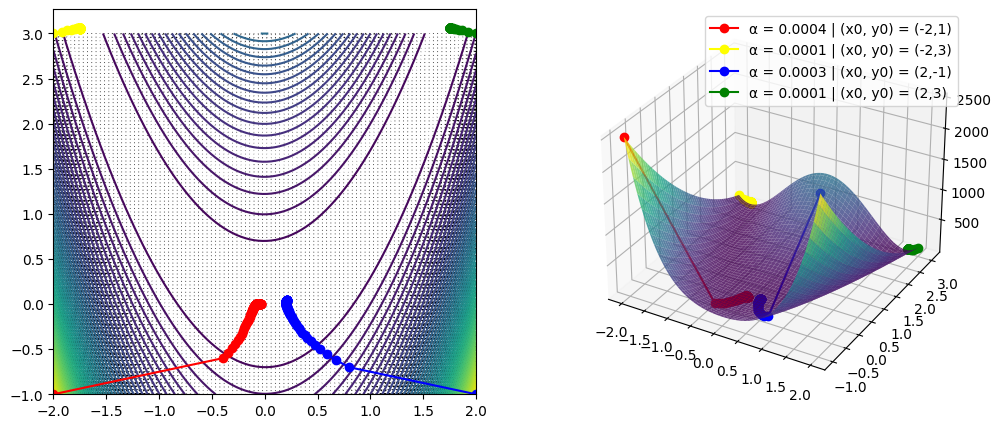

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Rosenbrock(x, y, a=1, b=100):
  return (((a-x)**2)+(b * (y- x**2)**2))

def Grad(x, y, a=1, b=100):
    df_dx = -2*(a-x) - 4*b*x*(y-x**2)
    df_dy = 2*b*(y-x**2)
    return np.array([df_dx, df_dy])

def GradientDescent(xk, yk, alpha, K):
    PointsHist = [[xk, yk, Rosenbrock(xk, yk)]]
    for k in range(K):
      gradiente = Grad(xk, yk)
      xk = xk - (alpha * gradiente[0])
      yk = yk - (alpha * gradiente[1])
      PointsHist.append([xk, yk, Rosenbrock(xk, yk)])
    return (np.array(PointsHist))

def GetSurface():
  X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 3, 100))
  Z = Rosenbrock(X, Y)
  PlotSurface(X, Y, Z)

def TestGradientDescent(ax, mood):
      PlotGradientDescent(-2, -1, 0.0004, 100,
                          'red', 'α = 0.0004 | (x0, y0) = (-2,1)', ax, mood)
      PlotGradientDescent(-2, 3, 0.0001, 100,
                          'yellow', 'α = 0.0001 | (x0, y0) = (-2,3)', ax, mood)
      PlotGradientDescent(2, -1, 0.0003, 100,
                          'blue', 'α = 0.0003 | (x0, y0) = (2,-1)', ax, mood)
      PlotGradientDescent(2, 3, 0.0001, 100,
                          'green', 'α = 0.0001 | (x0, y0) = (2,3)', ax, mood)

GetSurface()

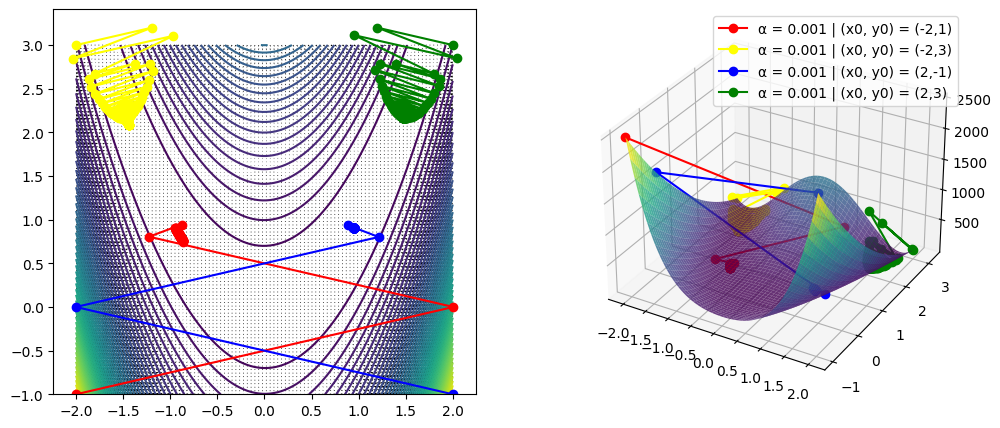

In [ ]:
def TestGradientDescent(ax, mood):
      PlotGradientDescent(-2, -1, 0.001, 100,
                          'red', 'α = 0.001 | (x0, y0) = (-2,1)', ax, mood)
      PlotGradientDescent(-2, 3, 0.001, 100,
                          'yellow', 'α = 0.001 | (x0, y0) = (-2,3)', ax, mood)
      PlotGradientDescent(2, -1, 0.001, 100,
                          'blue', 'α = 0.001 | (x0, y0) = (2,-1)', ax, mood)
      PlotGradientDescent(2, 3, 0.001, 100,
                          'green', 'α = 0.001 | (x0, y0) = (2,3)', ax, mood)
GetSurface()



# Referências bibliográficas
[1] LEWIS, F.L.;VRABIE,D.L;SYRMOS,V.L. **Optimal Control**. 3ed. Wiley, 2012

[2] NOCEDAL, Jorge; WRIGHT, Stephen J. **Numerical Optimization**. 2. ed. New York:

